In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please use urllib or similar directly.


Instructions for updating:
Please use urllib or similar directly.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.


Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
x=tf.placeholder(tf.float32,[None,784]) 

In [8]:
P=tf.Variable(tf.zeros([784,10]))

In [9]:
b=tf.Variable(tf.zeros([10]))

In [10]:
y=tf.matmul(x,P) + b

In [11]:
yR=tf.placeholder(tf.float32,[None,10])

In [12]:
softmax=tf.nn.softmax_cross_entropy_with_logits(labels=yR,logits=y)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [13]:
costo=tf.reduce_mean(softmax)

In [14]:
optimizador=tf.train.GradientDescentOptimizer(0.5).minimize(costo)

In [15]:
prediccion = tf.equal(tf.argmax(y, 1), tf.argmax(yR, 1)) #Nos da arreglo de booleanos para decirnos 
                                                         #cuales estan bien y cuales no
accuracy = tf.reduce_mean(tf.cast(prediccion, tf.float32))#Nos da el porcentaje sobre el arreglo de prediccion
Produccion = tf.argmax(y,1)
init=tf.global_variables_initializer()

In [18]:
#Funcion que usaremos para ver que tan bien va a aprendiendo nuestro modelo 
def avance(epoca_i, sess, last_features, last_labels):
    costoActual = sess.run(costo,feed_dict={x: last_features, yR: last_labels})
    Certeza = sess.run(accuracy,feed_dict={x:mnist.validation.images,yR: mnist.validation.labels})
    print('Epoca: {:<4} - Costo: {:<8.3} Certeza: {:<5.3}'.format(epoca_i,costoActual,Certeza))

In [50]:
with tf.Session() as sess:
    sess.run(init)
    for epoca_i in range(1000):
        lotex,lotey = mnist.train.next_batch(100)
        sess.run(optimizador,feed_dict={x: lotex,yR:lotey})
        if (epoca_i % 50 == 0):
            avance(epoca_i,sess,lotex,lotey)
    print('RESULTADO FINAL: ',sess.run(accuracy, feed_dict={x: mnist.test.images,yR: mnist.test.labels}))
    print ('Resultado de una imagen cualquiera',sess.run(Produccion,feed_dict={x: mnist.test.images[4].reshape(1,784)}))        
    

Epoca: 0    - Costo: 1.68     Certeza: 0.371
Epoca: 50   - Costo: 0.377    Certeza: 0.882
Epoca: 100  - Costo: 0.248    Certeza: 0.9  
Epoca: 150  - Costo: 0.156    Certeza: 0.901
Epoca: 200  - Costo: 0.353    Certeza: 0.9  
Epoca: 250  - Costo: 0.354    Certeza: 0.908
Epoca: 300  - Costo: 0.261    Certeza: 0.906
Epoca: 350  - Costo: 0.243    Certeza: 0.907
Epoca: 400  - Costo: 0.441    Certeza: 0.915
Epoca: 450  - Costo: 0.182    Certeza: 0.913
Epoca: 500  - Costo: 0.168    Certeza: 0.916
Epoca: 550  - Costo: 0.342    Certeza: 0.917
Epoca: 600  - Costo: 0.175    Certeza: 0.918
Epoca: 650  - Costo: 0.212    Certeza: 0.921
Epoca: 700  - Costo: 0.333    Certeza: 0.922
Epoca: 750  - Costo: 0.251    Certeza: 0.922
Epoca: 800  - Costo: 0.222    Certeza: 0.918
Epoca: 850  - Costo: 0.202    Certeza: 0.921
Epoca: 900  - Costo: 0.329    Certeza: 0.919
Epoca: 950  - Costo: 0.252    Certeza: 0.924
RESULTADO FINAL:  0.918
Resultado de una imagen cualquiera [4]


In [51]:
mnist.test.labels[4]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

{'test': <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

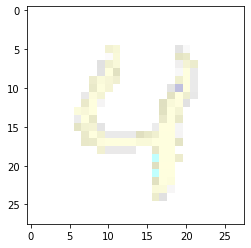

In [57]:
%matplotlib inline
from pylab import imread,subplot,imshow,show
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image  
import PIL
import os
import io
#import Image
bimage = Image.frombytes('RGBA', (28,28), mnist.test.images[4])
im1 = bimage.save("digito.png")
img=mpimg.imread('digito.png')
plt.figure()
plt.imshow(img)
plt.show()

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

NameError: name 'input_data' is not defined